In [1]:

import matplotlib.pyplot as plt
import collections
import seaborn as sns
from freqtrade.data.btanalysis import load_trades_from_db

In [4]:
!mkdir data

In [71]:
!scp matt@142.93.55.238:freqtrade/tradesv3.dryrun.sqlite data

tradesv3.dryrun.sqlite                        100%  268KB 719.8KB/s   00:00    


In [72]:
!ls data

tradesv3.dryrun.sqlite     tradesv3.dryrun.sqlite-wal
tradesv3.dryrun.sqlite-shm tradesv3.sqlite


In [82]:
trades = load_trades_from_db("sqlite:///data/tradesv3.dryrun.sqlite")
trades.head()
trades_list = [r for (_, r) in trades.iterrows()]
trades_list[0]

pair                                                               LINK/USDT
stake_amount                                                     19999.98957
amount                                                              14499.05
open_date                                          2022-10-24 23:47:19+00:00
close_date                                         2022-10-25 00:00:13+00:00
open_rate                                                              6.897
close_rate                                                             6.905
fee_open                                                              0.0004
fee_close                                                             0.0004
trade_duration                                                          12.0
profit_ratio                                                        0.001797
profit_abs                                                         35.946045
exit_reason                                                      exit_signal

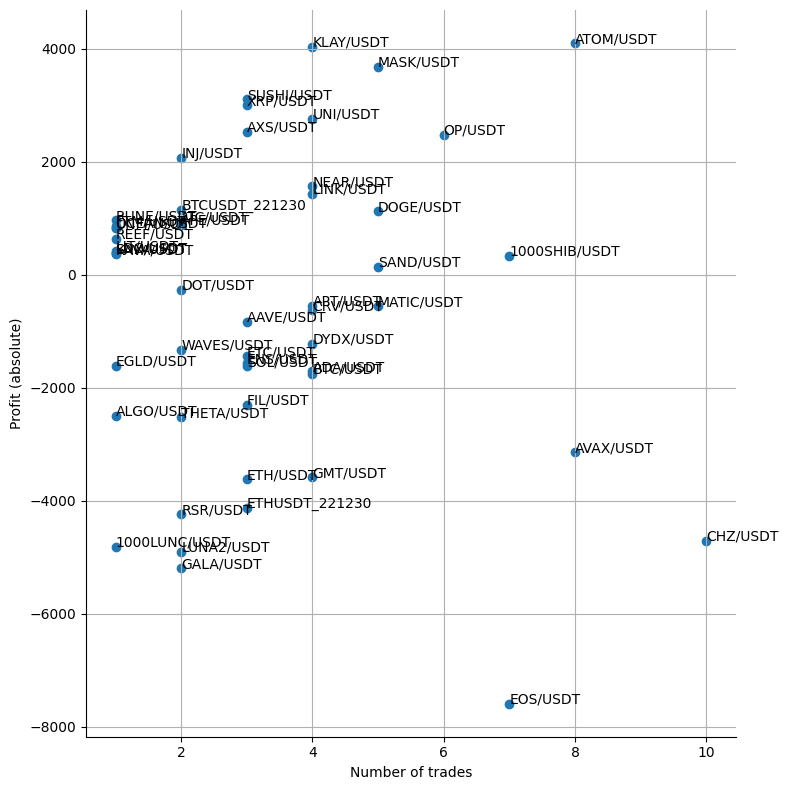

In [75]:
pairs = {}

for t in trades_list:
    if t['profit_abs'] == t['profit_abs']:
        if t['pair'] in pairs:
            pairs[t['pair']]['profit_abs'] += t['profit_abs']
            pairs[t['pair']]['n_trades'] += 1
        else:
            pairs[t['pair']] = {}
            pairs[t['pair']]['profit_abs'] = t['profit_abs']
            pairs[t['pair']]['n_trades'] = 1

# pairs = sorted(pairs.items(), key=lambda x: x['n_trades'], reverse=True)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter([i['n_trades'] for i in pairs.values()], [i['profit_abs'] for i in pairs.values()])
for pair, data in pairs.items():
    ax.annotate(pair, (data['n_trades'], data['profit_abs']))
ax.set_xlabel('Number of trades')
ax.set_ylabel('Profit (absolute)')
ax.grid()
plt.tight_layout()
sns.despine()
plt.show()


In [ ]:
trades_plt = []

for t in trades_list:
    if t['profit_abs'] == t['profit_abs']:
        if t['pair'] in trades_plt:
            pairs[t['pair']]['profit_abs'] += t['profit_abs']
            pairs[t['pair']]['n_trades'] += 1
        else:
            pairs[t['pair']] = {}
            pairs[t['pair']]['profit_abs'] = t['profit_abs']
            pairs[t['pair']]['n_trades'] = 1


## Bad trades

In [77]:
threshold = -0.1

bad_trades = [t for _, t in trades.iterrows() if t["profit_ratio"] < threshold]

In [78]:
print(len(bad_trades))

27


In [86]:
bad_trades = sorted(bad_trades, key=lambda x: (x['open_date']))

print('By date')

for t in bad_trades:
    print(
        f"{t['pair']}: "
        f"{t['open_rate']} - {t['close_rate']} "
        f"{t['profit_ratio']*100:.3f}% --- "
        f"({t['open_date']} - {t['close_date']}"
    )

print('By pair')

bad_trades = sorted(bad_trades, key=lambda x: (x['pair'], x['open_date']))

for t in bad_trades:
    print(
        f"{t['pair']}: "
        f"{t['open_rate']} - {t['close_rate']} "
        f"{t['profit_ratio']*100:.3f}% --- "
        f"({t['open_date']} - {t['close_date']}"
    )

By date
ETC/USDT: 22.405 - 22.98 -13.242% --- (2022-10-25 10:00:47+00:00 - 2022-10-25 14:00:19+00:00
BTC/USDT: 20207.2 - 20672.8 -11.828% --- (2022-10-26 07:00:26+00:00 - 2022-10-26 09:00:54+00:00
CHZ/USDT: 0.20295 - 0.19778 -13.127% --- (2022-10-26 11:05:03+00:00 - 2022-10-26 15:00:21+00:00
ETH/USDT: 1535.15 - 1582.9 -15.965% --- (2022-10-26 14:00:23+00:00 - 2022-10-26 14:18:33+00:00
ETHUSDT_221230: 1533.9 - 1584.74 -16.882% --- (2022-10-26 14:00:27+00:00 - 2022-10-26 14:18:31+00:00
SOL/USDT: 32.23 - 31.46 -12.385% --- (2022-10-27 06:35:05+00:00 - 2022-10-27 10:00:18+00:00
1000LUNC/USDT: 0.2471 - 0.2354 -24.056% --- (2022-10-27 18:00:21+00:00 - 2022-10-27 20:23:21+00:00
LUNA2/USDT: 2.5055 - 2.4249 -16.375% --- (2022-10-27 18:05:36+00:00 - 2022-10-27 20:20:50+00:00
DOGE/USDT: 0.08127 - 0.07871 -16.040% --- (2022-10-27 20:05:43+00:00 - 2022-10-27 20:23:30+00:00
KLAY/USDT: 0.2636 - 0.2728 -17.761% --- (2022-10-27 21:00:22+00:00 - 2022-10-27 21:32:15+00:00
EOS/USDT: 1.159 - 1.124 -15.487%

1000LUNC/USDT: 0.2471 -24.056% --- (2022-10-27 18:00:21+00:00 - 2022-10-27 20:23:21+00:00
ADA/USDT: 0.4301 -12.480% --- (2022-10-29 17:00:18+00:00 - 2022-10-29 18:57:17+00:00
ALGO/USDT: 0.361 -12.481% --- (2022-10-30 15:00:23+00:00 - 2022-10-30 15:50:48+00:00
AVAX/USDT: 18.471 -10.045% --- (2022-10-29 08:00:19+00:00 - 2022-10-29 09:00:22+00:00
BTC/USDT: 20207.2 -11.828% --- (2022-10-26 07:00:26+00:00 - 2022-10-26 09:00:54+00:00
CHZ/USDT: 0.20295 -13.127% --- (2022-10-26 11:05:03+00:00 - 2022-10-26 15:00:21+00:00
CRV/USDT: 0.941 -12.080% --- (2022-10-30 08:23:54+00:00 - 2022-10-30 09:42:13+00:00
DOGE/USDT: 0.08127 -16.040% --- (2022-10-27 20:05:43+00:00 - 2022-10-27 20:23:30+00:00
DYDX/USDT: 1.865 -18.080% --- (2022-10-29 17:00:20+00:00 - 2022-10-29 17:23:41+00:00
ENS/USDT: 18.089 -12.565% --- (2022-10-30 08:10:26+00:00 - 2022-10-30 08:33:01+00:00
EOS/USDT: 1.159 -15.487% --- (2022-10-28 01:00:21+00:00 - 2022-10-28 02:18:13+00:00
ETC/USDT: 22.405 -13.242% --- (2022-10-25 10:00:47+00:00 